# S3: All cells characterization

In [1]:
%%capture

# settings
wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
warnings.filterwarnings('ignore')
%matplotlib inline

# import data from s3
for file in ['raw_adata', 
             'full_adata',
             'DE_df',
            ]:
#     ! aws s3 cp s3://{s3dir}/{file}.p {wkdir}/
    var = pickle.load((open(f'{wkdir}/{file}.p', 'rb')))
    exec(f'{file} = var')
    del var
    
usable_cores = multiprocessing.cpu_count()-1

# update subtypes
full_adata.obs['subtypes'] = ['follicular' if x in ['light_foll_mel', 'dark_foll_mel', 'cyc_foll_mel'] \
                         else y \
                         for x,y in zip(full_adata.obs.class_1, full_adata.obs.subtypes)]

# label order
dev_stage_order = ['fet','neo','adt']
subtypes_order = ['cutaneous','acral','foreskin','follicular']
acral_subtype_order = ['acral','not_acral']
foreskin_subtype_order = ['foreskin','not_foreskin']
follicular_subtype_order = ['follicular','not_follicular']
dev_subtype_order = ['fet_acral','fet_cutaneous','fet_follicular','neo_foreskin','adt_acral','adt_cutaneous']

# create class_2 for site granularity
full_adata.obs['class_2'] = [x if x not in ['mel'] \
                             else f'{y}_mel'
                             for x,y in zip(full_adata.obs['class_1'], full_adata.obs['subtypes'])]

# create class_3 for site+dev_stage granularity
full_adata.obs['class_3'] = [x if not x.endswith('_mel') or x.startswith('cyc_') \
                             else f'{y}_{x}'
                             for x,y in zip(full_adata.obs['class_2'], full_adata.obs['dev_stage'])]

# update class_1 to pool by cell type
full_adata.obs['class_1'] = [x if not x.endswith('_mel') \
                             else 'mel' if not x.startswith('cyc_') \
                             else 'cyc_mel' \
                             for x in full_adata.obs['class_1']]
type_order_1 = ['mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]
    
DE_df['class_1'] = (DE_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order_1, ordered=True))
                     )
DE_df = DE_df.dropna()

type_order_2 = ['light_foll_mel',
                'dark_foll_mel',
                'foreskin_mel',
                'acral_mel',
                'cutaneous_mel',
                'cyc_foll_mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

type_order_3 = ['adt_cutaneous_mel',
                'adt_acral_mel',
                'neo_foreskin_mel',
                'fet_cutaneous_mel',
                'fet_acral_mel',
                'fet_dark_foll_mel',
                'fet_light_foll_mel',][::-1] + \
                ['cyc_mel',
                'cyc_foll_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

color_code_dict = {'dendritic':'#b99abf',
                   'cyc_dendritic':'#9abfb9',
                   'eccrine':'#CBB7E3',
                   'cyc_eccrine':'#b7e3cb',
                   'krt':'#E9E1F2',
                   'cyc_krt':'#e1f2e9',
                   'mast':'#AE90C2',
                   'T_cell':'#5F3D68',
                   'mel':'#000000',
                   'cyc_mel':'#999999',
                   'cutaneous_mel':'#FF0000',
                   'cutaneous':'#FF0000',
                   'leg':'#FF0000',
                   'arm':'#FF0000',
                   'acral_mel':'#0000FF',
                   'acral':'#0000FF',
                   'palm':'#0000FF',
                   'sole':'#0000FF',
                   'foreskin_mel':'#FFA500',
                   'foreskin':'#FFA500',
                   'dark_foll_mel':'#003300',
                   'light_foll_mel':'#99cc99',
                   'follicular':'#008000',
                   'hair_follicle':'#008000',
                   'fet_cutaneous_mel':'#ff4c4c',
                   'adt_cutaneous_mel':'#b20000',
                   'shallow_regime':'#b20000',
                   'steep_regime':'#00b2b2',
                   'fet_acral_mel':'#4c4cff',
                   'adt_acral_mel':'#0000b2',
                   'neo_foreskin_mel':'#FFA500',
                   'fet_dark_foll_mel':'#003300',
                   'fet_light_foll_mel':'#99cc99',
                   'fet':'#dbc2a9',
                   'neo':'#c09569',
                   'adt':'#a5682a',
                   'NTRK2+/HPGD+':'#474747',
                   'NTRK2-/HPGD-':'#DDDDDD',
                   'NTRK2+/HPGD-':'#0000FF',
                   'NTRK2-/HPGD+':'#FF0000',
                   'black':'#000000',
                   'grey':'#D3D3D3',
                   'melanoma':'#935aff',
                   'mel':'#935aff',
                   'follicular_like':'#6514ff',
                   'adult_interfollicular':'#ff1439',
                   'follicular_low':'#ff1439',
                   'interfoll_mel':'#ff1439',
                   'neonatal_interfollicular':'#ffda14',
                   'fetal_interfollicular':'#1439ff',
                   'fetal_follicular':'#39ff14',
                   'follicular_high':'#39ff14',
                   'light_foll_mel':'#39ff14',
                   'dark_foll_mel':'#93ba8b',
                   'norm':'#000000',
                   'cluster_1':'#ff1439',
                   'cluster_0':'#ffda14',
                   'cluster_2':'#39ff14',
                  }
heatmap_cmap = 'jet'


## all cells UMAP

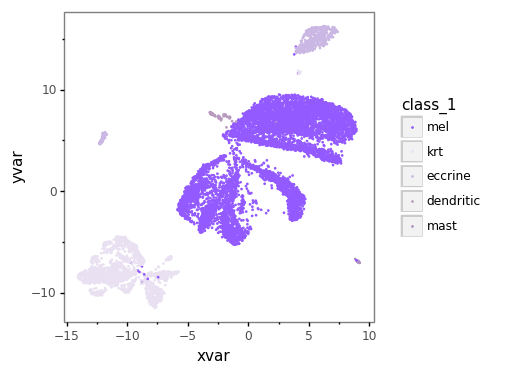

<ggplot: (-9223363300448690972)>


In [6]:
plot_dict = {'class_1':type_order_1,
#              'class_2':type_order_2,
#              'class_3':type_order_3
            }

for key,value in plot_dict.items():

    class_ref = key
    type_order_ref = value

    input_adata = full_adata[[not x.startswith('cyc_') for x in full_adata.obs[class_ref]]]
    umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
    umap_df[class_ref] = input_adata.obs[class_ref].values
    umap_df[class_ref] = (umap_df[class_ref]
                          .astype(str)
                          .astype(CategoricalDtype([x for x in type_order_ref \
                                                    if not x.startswith('cyc_') and \
                                                    x in set(umap_df[class_ref])
                                                   ], ordered=True))
                         )

    plotnine.options.figure_size = (4,4)
    plot = (ggplot(umap_df)
            + theme_bw()
            + theme(aspect_ratio = 1,
                    panel_grid_major = element_blank(), 
                    panel_grid_minor = element_blank()
                   )
            + geom_point(aes('xvar','yvar',color=class_ref), size = 0.1)
            + scale_color_manual(values = color_code_dict)
           )
    print(plot)


## all cells heatmap

computing...


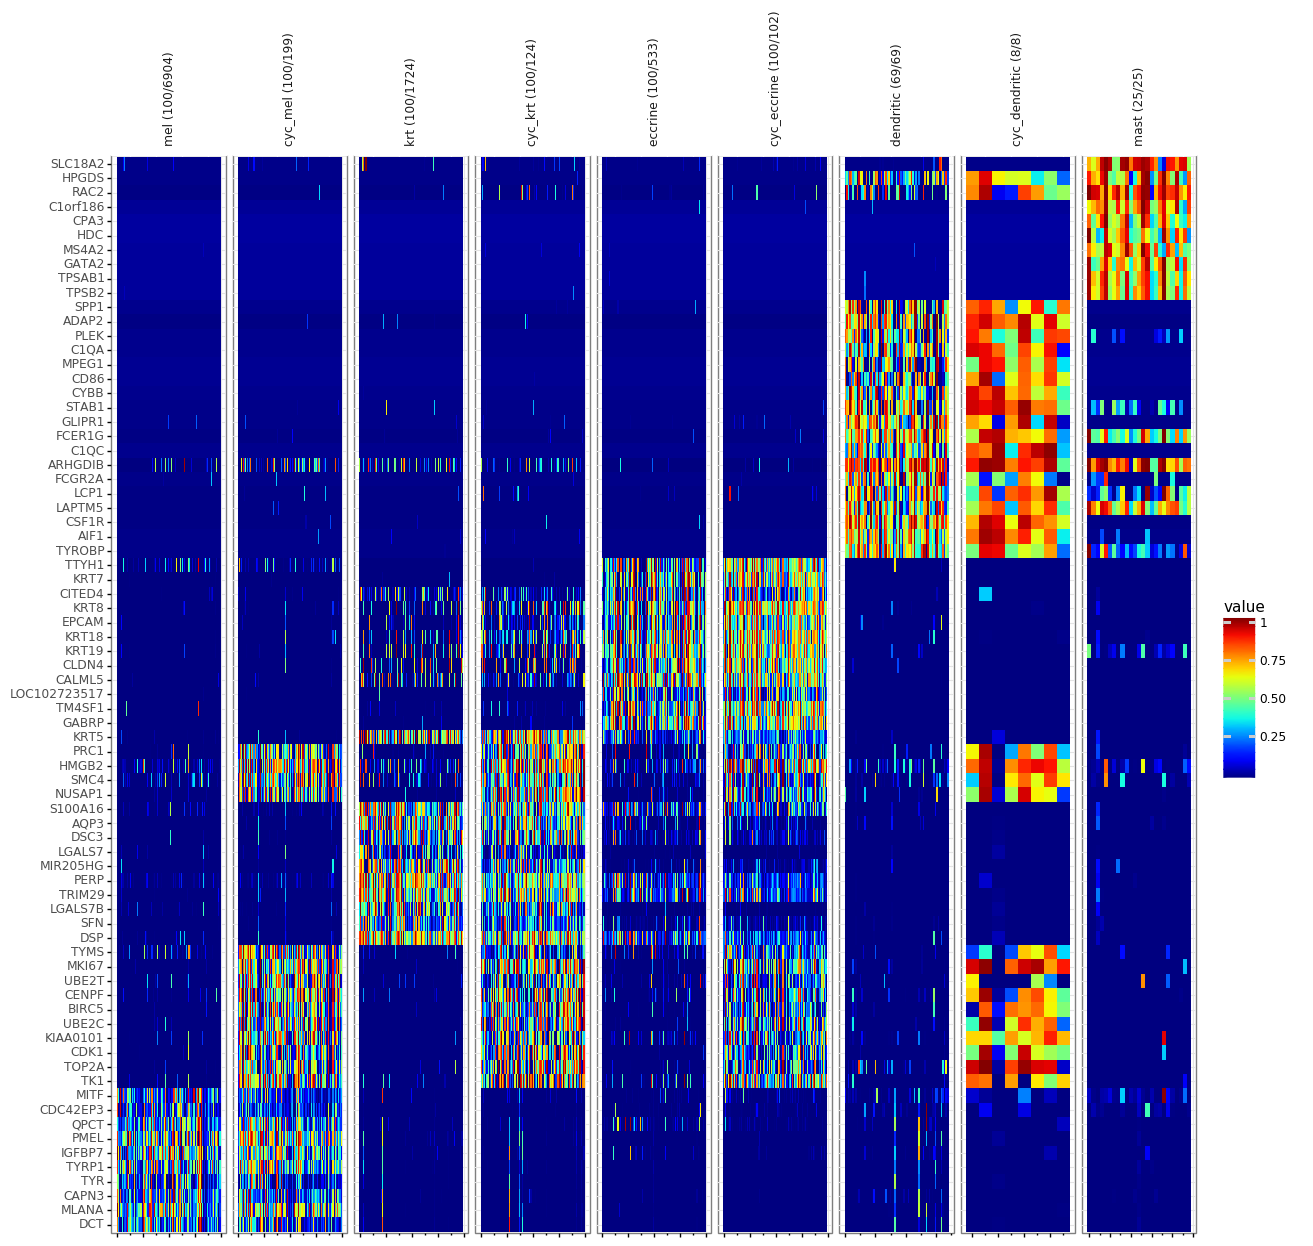

<ggplot: (-9223363300449700976)>


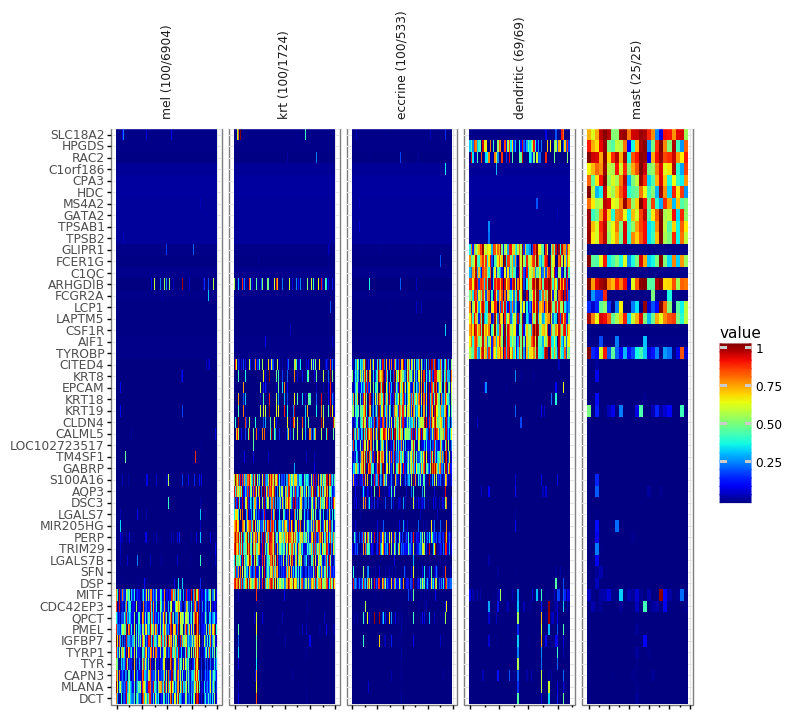

<ggplot: (8736405254755)>


In [3]:
print('computing...')
input_adata = full_adata
n_cells = 100

# extract cell types and genes order
type_order = DE_df.class_1.cat.categories.tolist()
gene_order = []
for x in type_order:
    df_slice = DE_df[DE_df.class_1 == x]
    df_slice = df_slice[~df_slice.gene.duplicated(keep='first')]
    gene_order = gene_order + [x for x in df_slice.gene if x not in gene_order]


cat, exp_df = prepare_dataframe(input_adata,
                 var_names = input_adata.var_names.tolist(),
                 groupby = 'cell')

# exp_df = exp_df.apply(lambda x: min_max_scaler(x.values))
exp_df = exp_df.rank(pct = True, method='dense')
exp_df = exp_df.loc[:,gene_order]
exp_df['class_1'] = input_adata.obs.class_1.tolist()

compiled_rows = pd.DataFrame()
type_order_revised = []
for x in type_order:
    df_slice = exp_df[exp_df.class_1 == x]
    df_nrow = len(df_slice)
    if df_nrow >= n_cells:
        df_sample = df_slice.sample(n_cells)
        num_cell = n_cells
    else:
        df_sample = df_slice
        num_cell = df_nrow
    idx_list = [x for x in range(len(df_sample))]
    random.shuffle(idx_list)
    df_sample['idx'] = idx_list
    df_sample['class_1'] = f'{x} ({num_cell}/{df_nrow})'
    type_order_revised = type_order_revised + [f'{x} ({num_cell}/{df_nrow})']
    compiled_rows = compiled_rows.append(df_sample)
    
compiled_rows_melt = pd.melt(compiled_rows, id_vars=['class_1','idx'])
compiled_rows_melt['class_1'] = (compiled_rows_melt['class_1']
                                 .astype(str)
                                 .astype(CategoricalDtype(type_order_revised,
                                                          ordered=True
                                                         )
                                        )
                                )
compiled_rows_melt['variable'] = (compiled_rows_melt['variable']
                                 .astype(str)
                                 .astype(CategoricalDtype(gene_order,
                                                          ordered=True
                                                         )
                                        )
                                )

plotnine.options.figure_size = (14,14)
plot = (ggplot(compiled_rows_melt)
      + theme_bw()
      + theme(axis_text_x = element_blank(),
              strip_text_x = element_text(angle = 90, vjust = 0),
              strip_background_x = element_rect(fill = 'white', color = 'white') )
      + geom_tile(aes('idx','variable',fill='value'))
      + facet_grid('~class_1', scales='free')
      + scale_fill_cmap(heatmap_cmap)
      + labs(x = '', y = ''))

print(plot)

plot_df = compiled_rows_melt[[not x.startswith('cyc_') for x in compiled_rows_melt.class_1]]
gene_order_trimmed = DE_df[[not x.startswith('cyc_') for x in DE_df.class_1]].gene.tolist()
plot_df = plot_df[[x in gene_order_trimmed for x in plot_df.variable]]

plotnine.options.figure_size = (7.5,7.5)
plot = (ggplot(plot_df)
      + theme_bw()
      + theme(axis_text_x = element_blank(),
              strip_text_x = element_text(angle = 90, vjust = 0),
              strip_background_x = element_rect(fill = 'white', color = 'white') )
      + geom_tile(aes('idx','variable',fill='value'))
      + facet_grid('~class_1', scales='free')
      + scale_fill_cmap(heatmap_cmap)
      + labs(x = '', y = ''))

print(plot)


MEL_module


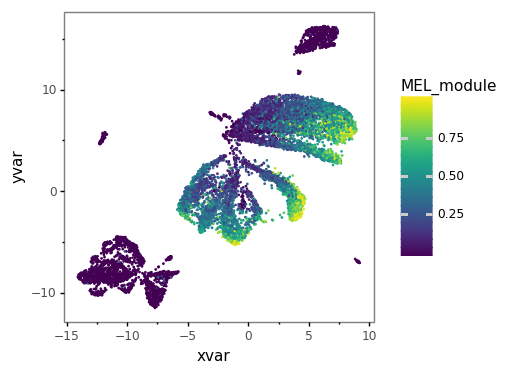

<ggplot: (-9223363300492514402)>
bKRT_module


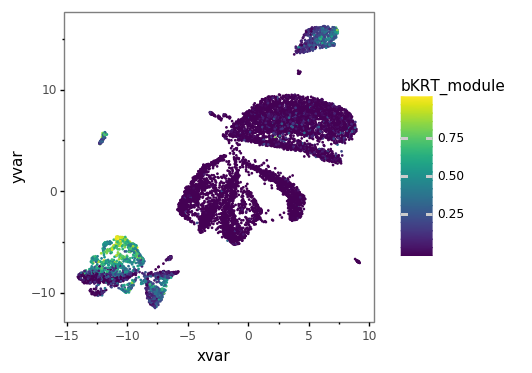

<ggplot: (-9223363300492684435)>
sbKRT_module


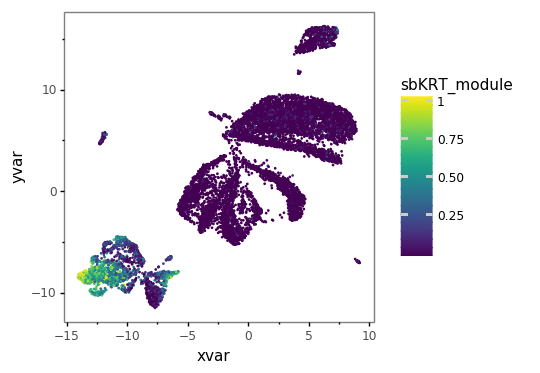

<ggplot: (-9223363300492684449)>
immune_module


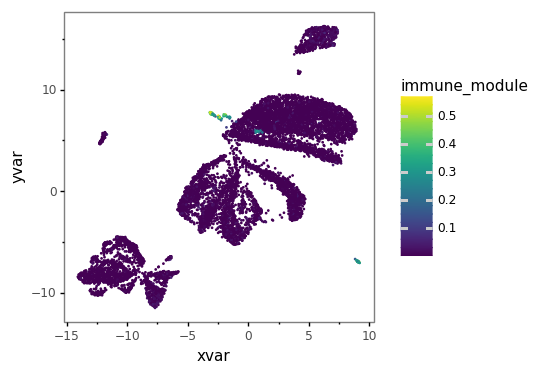

<ggplot: (-9223363300492514367)>
eccrine_module


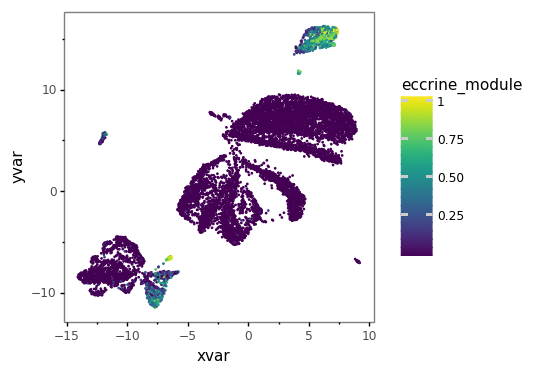

<ggplot: (8736362236848)>
msc_module


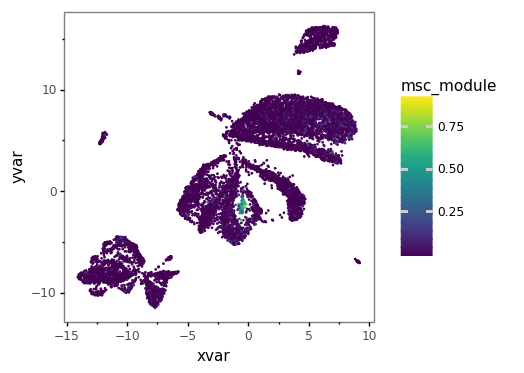

<ggplot: (8736362194275)>


In [4]:
input_adata = full_adata
    
MEL_module = ['TYR','TYRP1','DCT','MITF','IGFBP7','PMEL','MLANA']
bKRT_module = ['ITGB4','KRT14','KRT5']
sbKRT_module = ['KRT1','DSG1','DSC3']
ecc_module = ['KRT18','KRT19','KRT8']
immune_module = ['FCGR2A','FCER1G','C1QC','LAPTM5','CSF1R','AIF1',
                 'LAPTM5','FCER1G','SLC18A2','GATA2',
                 'TPSAB1','CPA3','HDC','GATA2',
                 'TYROBP','CSF1R','LAPTM5','FCGR2A','FCER1G','LCP1','CD4','C1QC',
                'FYB','CORO1A','CXCR4','CD3D','CD52','PTPRCAP','IL32']
msc_module = ['EDNRA','PRRX1','CDH11','COL6A2','TWIST1','TWIST2']

# compile modules
modules_dict = {
                'MEL_module':MEL_module,
                'bKRT_module':bKRT_module,
                'sbKRT_module':sbKRT_module,
                'immune_module':immune_module,
                'eccrine_module':ecc_module,
                'msc_module':msc_module, 
               }

input_adata.obs['cell'] = input_adata.obs.index.tolist()
input_adata.obs['cell'] = (input_adata
                          .obs['cell']
                          .astype(str)
                          .astype(CategoricalDtype(input_adata.obs['cell'].tolist())))
cat, exp_df = prepare_dataframe(input_adata,
                 var_names = input_adata.var_names,
                 groupby = 'cell')
exp_df = exp_df.rank(pct=True, method = 'dense')

for key,value in modules_dict.items():
    print(key)
    input_adata.obs[key] = exp_df.loc[:,value].mean(axis=1)
#         sc.pl.umap(input_adata, color=[key], cmap = 'magma', palette = 'tab20')

    umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
    umap_df[key] = input_adata.obs[key].values

    plotnine.options.figure_size = (4,4)
    plot = (ggplot(umap_df)
            + theme_bw()
            + theme(aspect_ratio = 1,
                    panel_grid_major = element_blank(), 
                    panel_grid_minor = element_blank()
                   )
            + geom_point(aes('xvar','yvar',color=key), size = 0.1)
           )
    print(plot)


## FACs gate x cell type

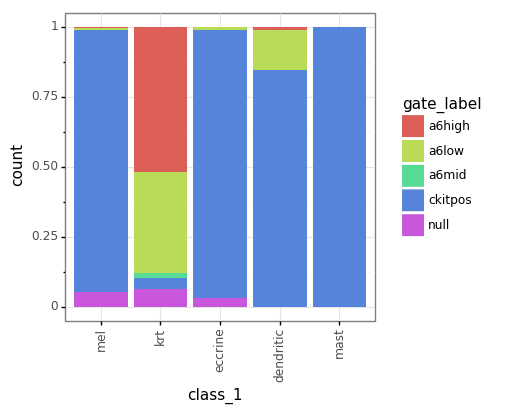

<ggplot: (-9223363300449152624)>

In [5]:
plot_df = (full_adata
             .obs
             .loc[:,['class_1', 'gate_label']]
                       )
plot_df['class_1'] = [x[4:] if x.startswith('cyc_') else x for x in plot_df['class_1']]
label_order = list(plot_df['class_1'].value_counts().index)

plot_df = pd.DataFrame(plot_df
             .groupby('class_1')['gate_label']
             .value_counts()
            ).rename(columns = {'gate_label':'count'})
plot_df = (plot_df / plot_df.groupby('class_1').sum()).reset_index()
plot_df['class_1'] = (plot_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(label_order, ordered = True))
                     )

plot = (ggplot(plot_df)
        + theme_bw()
        + theme(axis_text_x = element_text(angle=90))
        + geom_bar(aes('class_1','count',fill='gate_label'), stat='identity')
       )
plot